In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Split the data into features (X) and target (y)

import pandas as pd
trainPath = 'D:/Ayush&Saptarshi/archive/Celeb_Combined_inter/Combined_inter/train.csv'
dfTrain = pd.read_csv(trainPath, index_col=False, header = None)

#Storing class label
y_train = dfTrain[dfTrain.columns[-1]]

#removing last column
X_train = dfTrain.drop(dfTrain.columns[[-1]], axis=1)


testPath = 'D:/Ayush&Saptarshi/archive/Celeb_Combined_inter/Combined_inter/test.csv'
dfTest = pd.read_csv(testPath, index_col=False, header = None)

#Storing class label
y_test = dfTest[dfTest.columns[-1]]

#removing last column
X_test = dfTest.drop(dfTest.columns[[-1]], axis=1)
#X_test = X_test.fillna(0)


print(len(X_test.axes[0]), len(X_test.axes[1]))

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

199 4352


In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
# The model is now trained! We can make predictions on the test dataset, which we can use later to score the model.
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8140703517587939


In [5]:
# More Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8140703517587939
Precision: 0.8181818181818182
Recall: 0.81


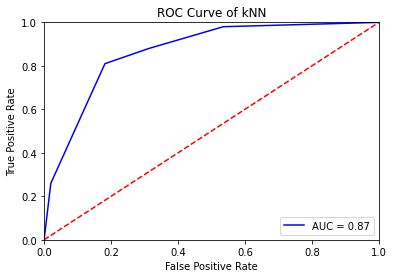

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()